In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


Dagens uppgift är först och främst att analysera 3 stycken data och välja en av dem som har bäst kvalite. Sedan ska jag med hjälp av Support Vector Machine träna valda datan och få ut testscoren av den. Och avslutningsvis rita ut datan utan hyperplanet och med hyperplanet.

## Laddar dem 3 dataset

In [2]:
rd_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift3/random_data.csv")

rd2_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift3/random_data_2.csv")

rd3_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift3/random_data_3.csv")



### Analyserar data nummer 1

Datan innehåller 1000 rader och 3 kolumner <br>
Datatypen är av integers och floats. Den har inga saknade värden, inga dubbletter och inga extremvärden.

In [27]:
print("Total number of data:", rd_df.shape[0])
rd_df.head()

Total number of data: 1000


,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [25]:
rd_df.dtypes

feature_1    float64
feature_2    float64
target         int64
dtype: object

In [129]:
rd_df.isna().sum()


feature_1    0
feature_2    0
target       0
dtype: int64

In [110]:
listWithFalseTrue = pd.DataFrame.duplicated(rd_df)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

False


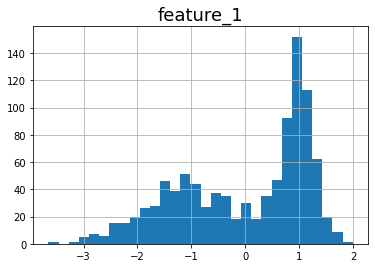

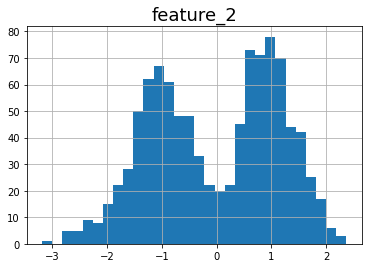

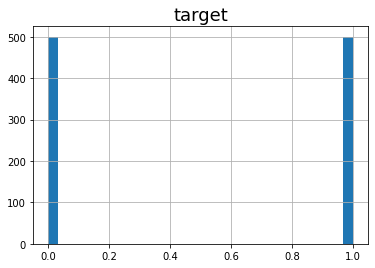

In [37]:
for column in rd_df.columns:
    rd_df[column].hist(bins=30)
    plt.title(column, fontsize = 18)
    plt.show()

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

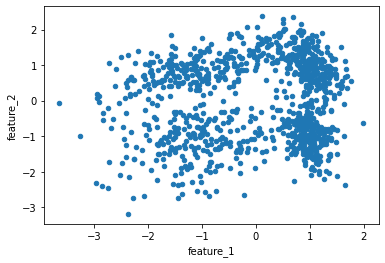

In [145]:
# Undersöker om det finns några extremvärden
rd_df.plot.scatter(x="feature_1", y = "feature_2")

### Analyserar data nummer 2

Data nummer 2 är nästan felfritt som data nummer 1. Ända felet är att den har dubletter.

In [28]:
print("Total number of data:", rd2_df.shape[0])
rd2_df.head()

Total number of data: 1000


,feature_1,feature_2,target
0,0.811586,1.977330,1
1,-0.283428,-1.368891,0
2,-0.281272,0.858368,1
3,0.617176,1.293528,1
4,1.080526,0.815136,1


In [7]:
rd2_df.dtypes

feature_1    float64
feature_2    float64
target         int64
dtype: object

In [143]:
rd2_df.isna().sum()

feature_1    0
feature_2    0
target       0
dtype: int64

In [111]:
listWithFalseTrue = pd.DataFrame.duplicated(rd2_df)
anyTrue = listWithFalseTrue.any()
print(anyTrue)

True


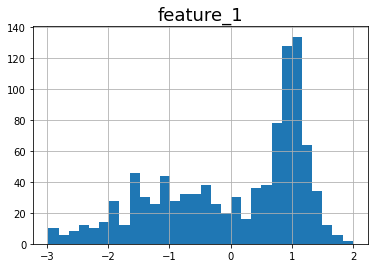

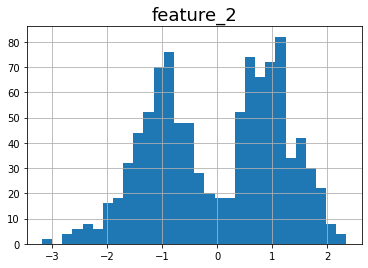

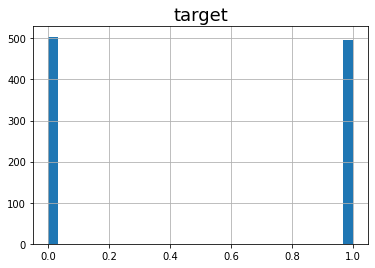

In [36]:
for column in rd2_df.columns:
    rd2_df[column].hist(bins=30)
    plt.title(column, fontsize = 18)
    plt.show()

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

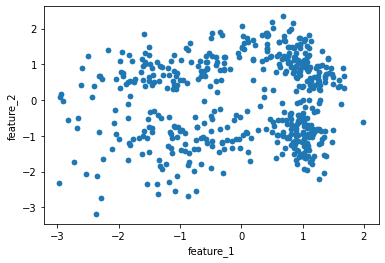

In [142]:
rd2_df.plot.scatter(x="feature_1", y = "feature_2")

### Analyserar data nummer 3

Datan har dubletter, saknade värden och en extra kolumn (Unnamed:0) som inte ska vara med.

In [31]:
print("Total number of data:", rd3_df.shape[0])

rd3_df.head()

Total number of data: 1000


,Unnamed: 0,feature_1,feature_2,target
0,0,0.811586,1.977330,1
1,1,-0.283428,NaN,0
2,2,-0.281272,0.858368,1
3,3,0.617176,1.293528,1
4,4,1.080526,0.815136,1


In [8]:
rd3_df.dtypes

Unnamed: 0      int64
feature_1     float64
feature_2     float64
target          int64
dtype: object

In [144]:
rd3_df.isna().sum()

Unnamed: 0     0
feature_1     50
feature_2     49
target         0
dtype: int64

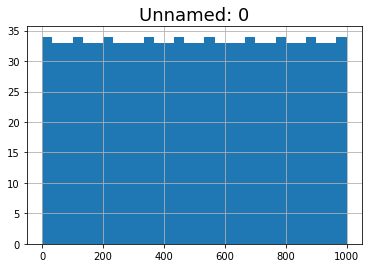

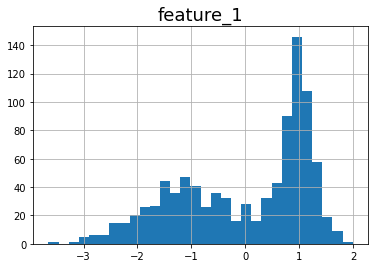

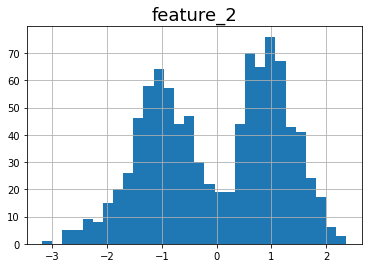

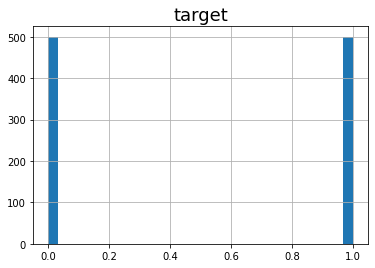

In [35]:
for column in rd3_df.columns:
    rd3_df[column].hist(bins=30)
    plt.title(column, fontsize = 18)
    plt.show()

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

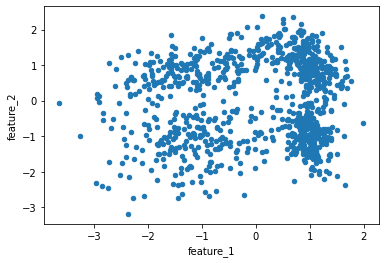

In [130]:
rd3_df.plot.scatter(x="feature_1", y = "feature_2")

### Val och ritning av datan

rd_df (data nummer 1) har minst problem/fel och därför väljer jag att utgå från den i fortsättningen.

In [55]:
x = rd_df.drop(columns="target")
y = rd_df["target"]

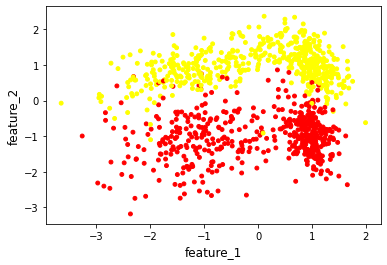

In [125]:
plt.scatter(x["feature_1"], x["feature_2"], c = y, s= 15, cmap = "autumn")

plt.xlabel(x.iloc[:,0].name, fontsize=12)
plt.ylabel(x.iloc[:,1].name, fontsize=12)
plt.show()

### Tränar Support Vector Machine

In [139]:
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=42)

# Linear kernel
SVM = svm.SVC(kernel="linear", C= 1)
SVM.fit(x_train,y_train)

test_score = SVM.score(x_test,y_test)

# Sigmoid kernel
SVM_2 = svm.SVC(kernel="sigmoid", C= 1)
SVM_2.fit(x_train, y_train)

test_score_2 = SVM_2.score(x_test,y_test)

# Poly kernel
SVM_3 = svm.SVC(kernel="poly", C= 1)
SVM_3.fit(x_train, y_train)

test_score_3 = SVM_3.score(x_test,y_test)


print("Modelens testscore är: ", test_score)
print("Sigmoid testscore är: ", test_score_2)
print("Poly testscore är: ", test_score_3)



Modelens testscore är:  0.9633333333333334
Sigmoid testscore är:  0.9033333333333333
Poly testscore är:  0.9666666666666667


### Ritar hela datan igen fast med hyperplanet

C:\Users\danij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


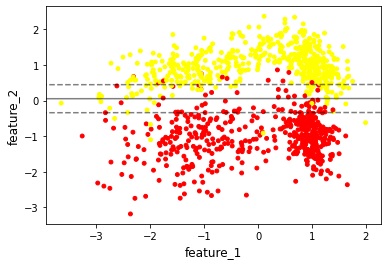

In [140]:
ax = plt.gca()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=15, cmap='autumn')
plt.xlabel(x.iloc[:,0].name, fontsize=12)
plt.ylabel(x.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = SVM.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.show()

### Ritar med testdatan

C:\Users\danij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


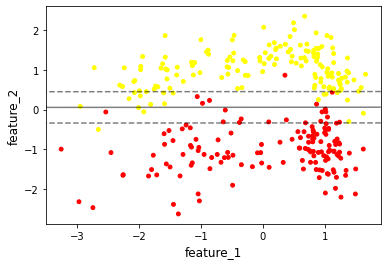

In [141]:
ax = plt.gca()
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=y_test, s=15, cmap='autumn')
plt.xlabel(x.iloc[:,0].name, fontsize=12)
plt.ylabel(x.iloc[:,1].name, fontsize=12)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = SVM.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])


plt.show()